In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Practical Machine Learning\Common_Folder\PML datasets\weather_data_missing.csv")
df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,NaN,9.0,Sunny
2,01-05-2017,28.0,NaN,Snow
3,01-06-2017,NaN,7.0,NaN
4,01-07-2017,32.0,NaN,Rain
5,01-08-2017,NaN,NaN,Sunny
6,01-09-2017,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,NaN,NaN,8.4,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          9 non-null      object 
 1   temperature  5 non-null      float64
 2   windspeed    6 non-null      float64
 3   event        7 non-null      object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


### Converting String(object) of day column into date format using parse_dates=['day']

In [4]:
df = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Practical Machine Learning\Common_Folder\PML datasets\weather_data_missing.csv", 
                parse_dates=['day'])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,NaT,NaN,8.4,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          9 non-null      datetime64[ns]
 1   temperature  5 non-null      float64       
 2   windspeed    6 non-null      float64       
 3   event        7 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 448.0+ bytes


### Setting day column as temperrory index 
### inplace is used to overwrite the original dataframe with new index column

In [6]:

df.set_index("day", inplace=True)
df1 = df.loc["01-01-2017"]
print(df1)
df

temperature    32.0
windspeed       6.0
event          Rain
Name: 2017-01-01 00:00:00, dtype: object


,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### Removing temperory index

In [7]:
df.reset_index(inplace=True)
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,NaT,NaN,8.4,NaN


### Checking null values

In [8]:
print(df.isna().sum())
df1 = df.isna()
df1

day            1
temperature    5
windspeed      4
event          3
dtype: int64


,day,temperature,windspeed,event
0,False,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,True,False,True
4,False,False,True,False
5,False,True,True,False
6,False,True,True,True
7,False,False,False,False
8,False,False,False,False
9,True,True,False,True


### Heatmap for null values

<Axes: >

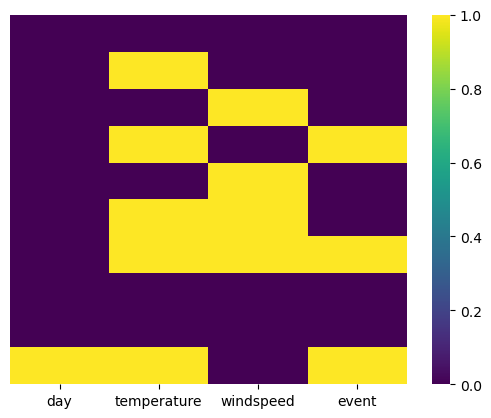

In [9]:
# yticklabels=False doesn't prints y-axis values(numbers in this case)
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

## Fillna

In [10]:
# Fill NaN with one specific values
new_df = df.fillna(0)
print(new_df)
# Fill NaN using column names and dictionay
new_df = df.fillna({'temperature':0,
                    'windspeed':1,
                    'event':'No Event'})
new_df

                   day  temperature  windspeed   event
0  2017-01-01 00:00:00         32.0        6.0    Rain
1  2017-01-04 00:00:00          0.0        9.0   Sunny
2  2017-01-05 00:00:00         28.0        0.0    Snow
3  2017-01-06 00:00:00          0.0        7.0       0
4  2017-01-07 00:00:00         32.0        0.0    Rain
5  2017-01-08 00:00:00          0.0        0.0   Sunny
6  2017-01-09 00:00:00          0.0        0.0       0
7  2017-01-10 00:00:00         34.0        8.0  Cloudy
8  2017-01-11 00:00:00         40.0       12.0   Sunny
9                    0          0.0        8.4       0


,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,0.0,9.0,Sunny
2,2017-01-05,28.0,1.0,Snow
3,2017-01-06,0.0,7.0,No Event
4,2017-01-07,32.0,1.0,Rain
5,2017-01-08,0.0,1.0,Sunny
6,2017-01-09,0.0,1.0,No Event
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,NaT,0.0,8.4,No Event


In [11]:
# Using mean
new_df = df.copy()

new_df['temperature'].fillna(new_df['temperature'].mean(), inplace=True)

wind_avg = new_df['windspeed'].mean()
new_df['windspeed'].fillna(wind_avg, inplace=True)
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,33.2,9.0,Sunny
2,2017-01-05,28.0,8.4,Snow
3,2017-01-06,33.2,7.0,NaN
4,2017-01-07,32.0,8.4,Rain
5,2017-01-08,33.2,8.4,Sunny
6,2017-01-09,33.2,8.4,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,NaT,33.2,8.4,NaN


In [12]:
# Use method to dertermine how to fillna values
new_df = df.fillna(method='ffill')    # Forward fill
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,7.0,Sunny
6,2017-01-09,32.0,7.0,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,2017-01-11,40.0,8.4,Sunny


In [13]:
new_df = df.fillna(method='bfill')    # Backward fill
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,28.0,9.0,Sunny
2,2017-01-05,28.0,7.0,Snow
3,2017-01-06,32.0,7.0,Rain
4,2017-01-07,32.0,8.0,Rain
5,2017-01-08,34.0,8.0,Sunny
6,2017-01-09,34.0,8.0,Cloudy
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,NaT,NaN,8.4,NaN


In [14]:
# Filling null values for single column using forward fill
new_df = df.loc[: , 'windspeed'].ffill()
new_df

0     6.0
1     9.0
2     9.0
3     7.0
4     7.0
5     7.0
6     7.0
7     8.0
8    12.0
9     8.4
Name: windspeed, dtype: float64

In [15]:
# Specify how many values to fill with ffill
new_df = df.fillna(method='ffill', limit=2)    # Forward fill
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,7.0,Sunny
6,2017-01-09,32.0,NaN,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny
9,2017-01-11,40.0,8.4,Sunny


### Interpolate

In [16]:
# Gradually increase the values while forward filling them
new_df = df[['temperature','windspeed']].interpolate()
new_df

,temperature,windspeed
0,32.000000,6.00
1,30.000000,9.00
2,28.000000,8.00
3,30.000000,7.00
4,32.000000,7.25
5,32.666667,7.50
6,33.333333,7.75
7,34.000000,8.00
8,40.000000,12.00
9,40.000000,8.40
